In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("iris.csv")
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [27]:
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [28]:
x = data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = data['variety']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [40]:
dtf = DecisionTreeClassifier(max_depth=3)
dtf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
y_pred = dtf.predict(x_test)
y_pred

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Setosa'], dtype=object)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)*100

100.0

In [43]:
for i in range(1,11):
    dtf = DecisionTreeClassifier(max_depth=i)
    dtf.fit(x_train, y_train)
    y_pred = dtf.predict(x_test)
    print(i , accuracy_score(y_pred, y_test))

1 0.6842105263157895
2 0.9736842105263158
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0


In [44]:
dtf.tree_.threshold

array([ 2.44999999, -2.        ,  4.75      ,  1.65000004, -2.        ,
       -2.        ,  1.75      ,  4.95000005, -2.        ,  1.55000001,
       -2.        ,  6.94999981, -2.        , -2.        ,  4.85000014,
        3.10000002, -2.        , -2.        , -2.        ])

In [45]:
dtf.tree_.feature

array([ 2, -2,  2,  3, -2, -2,  3,  2, -2,  3, -2,  0, -2, -2,  2,  1, -2,
       -2, -2], dtype=int64)

[Text(103.01538461538462, 201.90857142857143, 'X[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(77.26153846153846, 170.84571428571428, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(128.76923076923077, 170.84571428571428, 'X[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0, 39, 38]'),
 Text(51.50769230769231, 139.78285714285715, 'X[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(25.753846153846155, 108.72, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(77.26153846153846, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 139.78285714285715, 'X[3] <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(128.76923076923077, 108.72, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(103.01538461538462, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(154.52307692307693, 77.65714285714284, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Tex

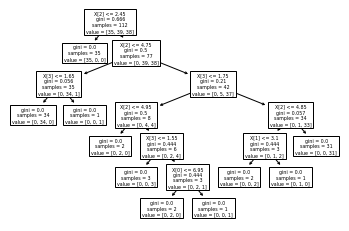

In [46]:
from sklearn import tree
tree.plot_tree(dtf)